# QClus Tutorial

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('..')

import qclus as qc
from qclus.gene_lists import *
from qclus.utils import *
import scanpy as sc
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [5]:
splicing_path = "../../samples/fraction_unspliced_loom.csv"
counts_path = "../../samples/counts.h5"

In [6]:
fraction_unspliced = pd.read_csv(splicing_path, index_col=0)

In [7]:
fraction_unspliced

,fraction_unspliced
AAACGCTCAGATACCT,0.259897
AAACCCAGTGAATGTA,0.774209
AAACGAACATTGACCA,0.526074
AAACCCAAGCAGCACA,0.832765
AAACGAATCCACAGGC,0.794653
...,...
TTTGATCTCCATACAG,0.734266
TTTGGTTCAATACGCT,0.266504
TTTGACTTCGCAGATT,0.559322
TTTGGAGAGCCGTTGC,0.645833


In [8]:
adata = qc.run_qclus(counts_path, fraction_unspliced)                            # outlier filter setting

In [9]:
adata

AnnData object with n_obs × n_vars = 25096 × 36601
    obs: 'fraction_unspliced', 'n_genes_by_counts', 'total_counts', 'total_counts_nuclear', 'pct_counts_nuclear', 'score_nuclear', 'total_counts_MT', 'pct_counts_MT', 'score_MT', 'total_counts_MT_nucl', 'pct_counts_MT_nucl', 'score_MT_nucl', 'total_counts_CM_cyto', 'pct_counts_CM_cyto', 'score_CM_cyto', 'total_counts_CM_nucl', 'pct_counts_CM_nucl', 'score_CM_nucl', 'total_counts_VEC', 'pct_counts_VEC', 'score_VEC', 'total_counts_PER', 'pct_counts_PER', 'score_PER', 'total_counts_SMC', 'pct_counts_SMC', 'score_SMC', 'total_counts_AD', 'pct_counts_AD', 'score_AD', 'total_counts_SC', 'pct_counts_SC', 'score_SC', 'total_counts_N', 'pct_counts_N', 'score_N', 'total_counts_EEC', 'pct_counts_EEC', 'score_EEC', 'total_counts_FB', 'pct_counts_FB', 'score_FB', 'total_counts_L', 'pct_counts_L', 'score_L', 'total_counts_MESO', 'pct_counts_MESO', 'score_MESO', 'total_counts_MP', 'pct_counts_MP', 'score_MP', 'pct_counts_nonCM', 'initial_filter', 'km

In [10]:
adata.obs.qclus.value_counts()

qclus
passed               8245
outlier filter       5769
initial filter       4236
clustering filter    4231
scrublet filter      2615
Name: count, dtype: int64

In [11]:
#filter out initial_filter annotated cells
adata = adata[adata.obs.qclus!="initial filter"]
adata.obsm["QClus_umap"] = adata.uns["QClus_umap"]

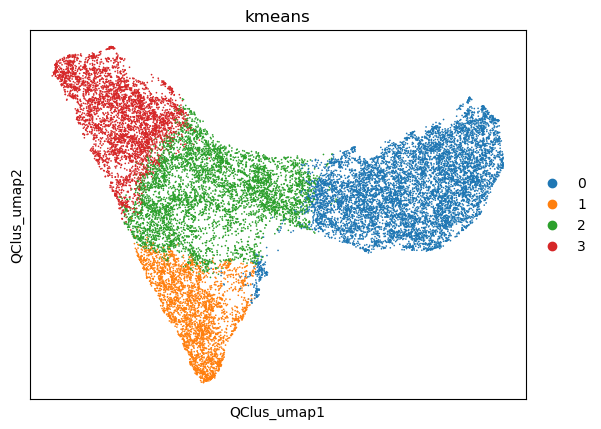

In [12]:
%matplotlib inline
sc.pl.embedding(adata, basis="QClus_umap", color="kmeans")

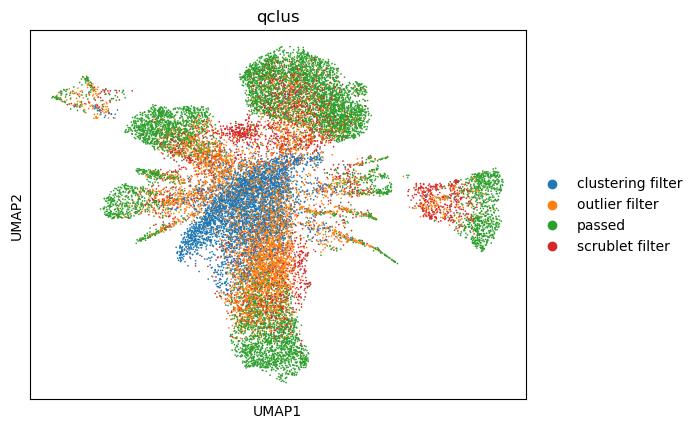

In [13]:
#run standard processing for visualization purposes
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

#save raw dataset and filter genes
adata.raw = adata
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pp.filter_genes(adata, min_cells=10)
adata = adata[:, adata.var.highly_variable]

sc.pp.regress_out(adata, ['total_counts', 'pct_counts_MT'], n_jobs = 4)
sc.pp.scale(adata, max_value=10)

sc.tl.pca(adata, svd_solver='randomized')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden")

sc.pl.umap(adata, color="qclus")

In [14]:
adata = adata[adata.obs.qclus=="passed"]
adata

View of AnnData object with n_obs × n_vars = 8245 × 2978
    obs: 'fraction_unspliced', 'n_genes_by_counts', 'total_counts', 'total_counts_nuclear', 'pct_counts_nuclear', 'score_nuclear', 'total_counts_MT', 'pct_counts_MT', 'score_MT', 'total_counts_MT_nucl', 'pct_counts_MT_nucl', 'score_MT_nucl', 'total_counts_CM_cyto', 'pct_counts_CM_cyto', 'score_CM_cyto', 'total_counts_CM_nucl', 'pct_counts_CM_nucl', 'score_CM_nucl', 'total_counts_VEC', 'pct_counts_VEC', 'score_VEC', 'total_counts_PER', 'pct_counts_PER', 'score_PER', 'total_counts_SMC', 'pct_counts_SMC', 'score_SMC', 'total_counts_AD', 'pct_counts_AD', 'score_AD', 'total_counts_SC', 'pct_counts_SC', 'score_SC', 'total_counts_N', 'pct_counts_N', 'score_N', 'total_counts_EEC', 'pct_counts_EEC', 'score_EEC', 'total_counts_FB', 'pct_counts_FB', 'score_FB', 'total_counts_L', 'pct_counts_L', 'score_L', 'total_counts_MESO', 'pct_counts_MESO', 'score_MESO', 'total_counts_MP', 'pct_counts_MP', 'score_MP', 'pct_counts_nonCM', 'initial_filter

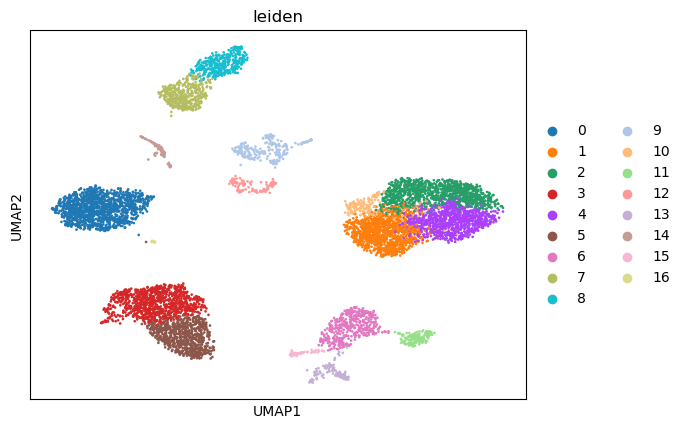

In [15]:
sc.tl.pca(adata, svd_solver='randomized')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata, key_added="leiden")

sc.pl.umap(adata, color="leiden")